In [1]:
import pandas as pd
import numpy as np
import igraph as ig
import matplotlib.pyplot as plt 
import collections

In [2]:
df_unweighted = pd.read_csv('combined_final_unweighted.csv')
df_unweighted

,node_start,node_end,status
0,Hong Kong,Samoa,jurisdiction
1,Hong Kong,Samoa,jurisdiction
2,Hong Kong,Samoa,jurisdiction
3,Hong Kong,Samoa,jurisdiction
4,Hong Kong,Samoa,jurisdiction
...,...,...,...
338127,Indonesia,British Virgin Islands,officer_base
338128,Cook Islands,British Virgin Islands,officer_base
338129,Hong Kong,British Virgin Islands,officer_base
338130,Cook Islands,United Kingdom,officer_base


In [3]:
df_weighted = pd.read_csv('combined_final_weighted.csv')
df_weighted

,node_start,node_end,status,weight
0,Hong Kong,Samoa,jurisdiction,2.0
1,Hong Kong,Samoa,jurisdiction,2.0
2,Hong Kong,Samoa,jurisdiction,2.0
3,Hong Kong,Samoa,jurisdiction,2.0
4,Hong Kong,Samoa,jurisdiction,2.0
...,...,...,...,...
338119,Indonesia,British Virgin Islands,officer_base,1.0
338120,Cook Islands,British Virgin Islands,officer_base,1.0
338121,Hong Kong,British Virgin Islands,officer_base,1.0
338122,Cook Islands,United Kingdom,officer_base,1.0


In [4]:
df_weighted_jur = df_weighted[df_weighted['status'] == 'jurisdiction']
df_jur = df_weighted_jur.drop(['weight','status'], axis = 1)
df_jur

,node_start,node_end
0,Hong Kong,Samoa
1,Hong Kong,Samoa
2,Hong Kong,Samoa
3,Hong Kong,Samoa
4,Hong Kong,Samoa
...,...,...
216554,British Virgin Islands,Cook Islands
216555,British Virgin Islands,Cook Islands
216556,British Virgin Islands,Cook Islands
216557,British Virgin Islands,Cook Islands


In [5]:
df_jur_grouped = df_jur.groupby(['node_start','node_end'], as_index = False).size()
df_jur_grouped

,node_start,node_end,size
0,Albania,Bahamas,2
1,Andorra,Bahamas,26
2,Andorra,British Virgin Islands,39
3,Andorra,Cayman Islands,1
4,Andorra,Costa Rica,3
...,...,...,...
1212,Vietnam,Panama,1
1213,Yemen,Panama,1
1214,Zambia,British Virgin Islands,2
1215,Zimbabwe,British Virgin Islands,5


### Convert Data to an Undirected Edge List

In [6]:
df_jur_grouped_list = df_jur_grouped.values.tolist()
df_jur_grouped_list

[['Albania', 'Bahamas', 2],
 ['Andorra', 'Bahamas', 26],
 ['Andorra', 'British Virgin Islands', 39],
 ['Andorra', 'Cayman Islands', 1],
 ['Andorra', 'Costa Rica', 3],
 ['Andorra', 'Hong Kong', 9],
 ['Andorra', 'Nevada', 24],
 ['Andorra', 'Niue', 12],
 ['Andorra', 'Panama', 279],
 ['Andorra', 'Samoa', 9],
 ['Andorra', 'Seychelles', 72],
 ['Andorra', 'United Kingdom', 1],
 ['Andorra', 'Uruguay', 15],
 ['Angola', 'Bermuda', 1],
 ['Angola', 'British Virgin Islands', 11],
 ['Antigua and Barbuda', 'Barbados', 8],
 ['Antigua and Barbuda', 'British Virgin Islands', 1],
 ['Antigua and Barbuda', 'Cayman Islands', 1],
 ['Antigua and Barbuda', 'Niue', 2],
 ['Antigua and Barbuda', 'Panama', 15],
 ['Antigua and Barbuda', 'Saint Kitts and Nevis', 1],
 ['Antigua and Barbuda', 'Seychelles', 3],
 ['Argentina', 'Bahamas', 23],
 ['Argentina', 'Barbados', 1],
 ['Argentina', 'British Virgin Islands', 83],
 ['Argentina', 'Cayman Islands', 3],
 ['Argentina', 'Costa Rica', 1],
 ['Argentina', 'Hong Kong', 4],
 

In [7]:
d = collections.defaultdict(int)
for n1, n2, v in df_jur_grouped_list:
    d[min(n1, n2), max(n1, n2)] += v
result = [[k[0], k[1], v] for k, v in d.items()]

In [8]:
df_net = pd.DataFrame(result)
df_net

,0,1,2
0,Albania,Bahamas,2
1,Andorra,Bahamas,26
2,Andorra,British Virgin Islands,39
3,Andorra,Cayman Islands,1
4,Andorra,Costa Rica,3
...,...,...,...
1125,Panama,Vietnam,1
1126,Panama,Yemen,1
1127,British Virgin Islands,Zambia,2
1128,British Virgin Islands,Zimbabwe,5


In [9]:
df_net = df_net.rename(columns = {0:'node_1', 1:'node_2', 2: 'weight'})
df_net

,node_1,node_2,weight
0,Albania,Bahamas,2
1,Andorra,Bahamas,26
2,Andorra,British Virgin Islands,39
3,Andorra,Cayman Islands,1
4,Andorra,Costa Rica,3
...,...,...,...
1125,Panama,Vietnam,1
1126,Panama,Yemen,1
1127,British Virgin Islands,Zambia,2
1128,British Virgin Islands,Zimbabwe,5


In [10]:
#import df_net to csv later

In [11]:
#plot the unweighted graph (try unweighted first)
g = ig.Graph.TupleList(df_net.itertuples(index=False), directed=False, edge_attrs={'weight': "weight"})


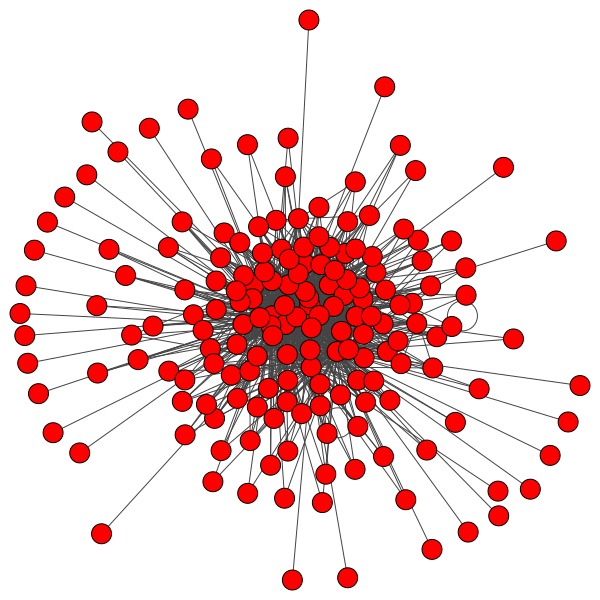

In [12]:
ig.plot(g)

In [13]:
g.diameter()

4

In [14]:
len(g.vs.indices)

174

In [15]:
#g.vs.indices
df_net['node_1'].value_counts()

British Virgin Islands    125
Bahamas                    93
Cayman Islands             73
Bermuda                    69
Barbados                   68
                         ... 
Croatia                     1
Libya                       1
Lesotho                     1
Namibia                     1
Spain                       1
Name: node_1, Length: 123, dtype: int64

In [16]:
uni =df_net['node_1'].unique()

In [17]:
len(uni)

123

In [18]:
list(g.vs)

[igraph.Vertex(<igraph.Graph object at 0x7fdff5335d60>, 0, {'name': 'Albania'}),
 igraph.Vertex(<igraph.Graph object at 0x7fdff5335d60>, 1, {'name': 'Bahamas'}),
 igraph.Vertex(<igraph.Graph object at 0x7fdff5335d60>, 2, {'name': 'Andorra'}),
 igraph.Vertex(<igraph.Graph object at 0x7fdff5335d60>, 3, {'name': 'British Virgin Islands'}),
 igraph.Vertex(<igraph.Graph object at 0x7fdff5335d60>, 4, {'name': 'Cayman Islands'}),
 igraph.Vertex(<igraph.Graph object at 0x7fdff5335d60>, 5, {'name': 'Costa Rica'}),
 igraph.Vertex(<igraph.Graph object at 0x7fdff5335d60>, 6, {'name': 'Hong Kong'}),
 igraph.Vertex(<igraph.Graph object at 0x7fdff5335d60>, 7, {'name': 'Nevada'}),
 igraph.Vertex(<igraph.Graph object at 0x7fdff5335d60>, 8, {'name': 'Niue'}),
 igraph.Vertex(<igraph.Graph object at 0x7fdff5335d60>, 9, {'name': 'Panama'}),
 igraph.Vertex(<igraph.Graph object at 0x7fdff5335d60>, 10, {'name': 'Samoa'}),
 igraph.Vertex(<igraph.Graph object at 0x7fdff5335d60>, 11, {'name': 'Seychelles'}),
 ig

In [19]:
##similar to mini-proj, try a random target 
import random
random.seed(5104)
def unweighted_Type1_random_delete(G):
    g = G.copy()
    
    nodes_removed =[]
    prop_removed =[]
    dia = []
    assort_deg = []
    degree = []
    density = []
    apl = []
    bet = []
    for i in range(len(g.vs)):
        sample = random.sample(g.vs.indices,1)
        #print(sample)
        g.delete_vertices(sample)
        
        diameter = g.diameter(directed=True)
        dia.append(diameter)
        
        asdeg = g.assortativity_degree()
        assort_deg.append(asdeg)
        
        between = g.betweenness(directed=True)
        bet.append(between)
        
        dense = g.density(loops=True)
        density.append(dense)
        #try in-degree
        deg = g.indegree()
        deg = sum(deg)/max(len(deg),1)
        degree.append(deg)
        
        avgpl = g.average_path_length()
        apl.append(avgpl)
        
        prop = round((i+1)/196,2)
        prop_removed.append(prop)
        nodes_removed.append(i+1)
        
        


    df = pd.DataFrame({'nodes_removed':nodes_removed,
                       'betweenness':bet,
                       'prop_removed':prop_removed,
                       'diameter':dia,
                       'assortativity_degree':assort_deg,
                       'avg_indegree':degree,
                       'density':density,
                       'average_path_len':apl})
    
    return(df)

In [20]:
#try another function but this time with g.diameter having weight param 
#https://igraph.org/python/api/latest/igraph._igraph.GraphBase.html#diameter

random.seed(5104)
def weighted_Type1_random_delete(G):
    g = G.copy()
    
    nodes_removed =[]
    prop_removed =[]
    dia = []
    assort_deg = []
    degree = []
    density = []
    apl = []
    bet = []
    for i in range(len(g.vs)):
        sample = random.sample(g.vs.indices,1)
        #print(sample)
        g.delete_vertices(sample)
        
        diameter = g.diameter(directed=True, weights='weight')
        dia.append(diameter)
        
        asdeg = g.assortativity_degree()
        assort_deg.append(asdeg)
        
        between = g.betweenness(directed=True, weights='weight')
        bet.append(between)
        
        dense = g.density(loops=True)
        density.append(dense)
        #try in-degree
        deg = g.indegree()
        deg = sum(deg)/max(len(deg),1)
        degree.append(deg)
        
        avgpl = g.average_path_length()
        apl.append(avgpl)
        
        prop = round((i+1)/196,2)
        prop_removed.append(prop)
        nodes_removed.append(i+1)
        
        


    df = pd.DataFrame({'nodes_removed':nodes_removed,
                       'prop_removed':prop_removed,
                       'diameter':dia,
                       'betweenness':bet,
                       'assortativity_degree':assort_deg,
                       'avg_indegree':degree,
                       'density':density,
                       'average_path_len':apl})
    
    return(df)

In [21]:
df_type1_unweighted = unweighted_Type1_random_delete(g)
df_type1_unweighted.head()

,nodes_removed,betweenness,prop_removed,diameter,assortativity_degree,avg_indegree,density,average_path_len
0,1,"[0.0, 1114.3028644092146, 0.25059956778410286,...",0.01,4.0,-0.581407,13.052023,0.075012,2.039118
1,2,"[0.0, 1094.154178499884, 0.25603354978354975, ...",0.01,4.0,-0.580282,13.034884,0.075346,2.039712
2,3,"[0.0, 1053.5842882866123, 0.25603354978354975,...",0.02,4.0,-0.586211,12.994152,0.075547,2.038596
3,4,"[0.0, 1017.7509549532788, 0.25603354978354975,...",0.02,4.0,-0.585468,13.023529,0.076161,2.038218
4,5,"[0.0, 990.4438791788119, 0.25603354978354975, ...",0.03,4.0,-0.585302,13.041420,0.076714,2.038109


In [22]:
df_type1_unweighted.tail()

,nodes_removed,betweenness,prop_removed,diameter,assortativity_degree,avg_indegree,density,average_path_len
169,170,"[0.0, 0.0, 0.0, 0.0]",0.87,0.0,NaN,0.0,0.0,NaN
170,171,"[0.0, 0.0, 0.0]",0.87,0.0,NaN,0.0,0.0,NaN
171,172,"[0.0, 0.0]",0.88,0.0,NaN,0.0,0.0,NaN
172,173,[0.0],0.88,0.0,NaN,0.0,0.0,NaN
173,174,[],0.89,NaN,NaN,0.0,NaN,NaN


In [23]:
df_type1_weighted = weighted_Type1_random_delete(g)
df_type1_weighted.head()

,nodes_removed,prop_removed,diameter,betweenness,assortativity_degree,avg_indegree,density,average_path_len
0,1,0.01,14.0,"[0.0, 949.6626019806824, 16.991116405411724, 2...",-0.580436,12.901734,0.074148,2.042613
1,2,0.01,14.0,"[0.0, 971.2150330835307, 17.815218835904084, 2...",-0.578656,12.848837,0.074271,2.043656
2,3,0.02,14.0,"[0.0, 965.9662002170508, 2501.6448159411393, 1...",-0.578963,12.783626,0.074323,2.044444
3,4,0.02,14.0,"[0.0, 960.2971525980033, 2484.973387369711, 16...",-0.578345,12.847059,0.075129,2.039262
4,5,0.03,14.0,"[0.0, 955.0185811694317, 2472.0210064173298, 1...",-0.578831,12.840237,0.075531,2.039659


In [24]:
df_type1_weighted.tail(15)

,nodes_removed,prop_removed,diameter,betweenness,assortativity_degree,avg_indegree,density,average_path_len
159,160,0.82,391.0,"[6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",-1.0,0.571429,0.038095,1.6
160,161,0.82,391.0,"[6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",-1.0,0.615385,0.043956,1.6
161,162,0.83,391.0,"[6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",-1.0,0.666667,0.051282,1.6
162,163,0.83,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,0.000000,0.000000,NaN
163,164,0.84,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,0.000000,0.000000,NaN
164,165,0.84,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",NaN,0.000000,0.000000,NaN
165,166,0.85,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",NaN,0.000000,0.000000,NaN
166,167,0.85,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",NaN,0.000000,0.000000,NaN
167,168,0.86,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",NaN,0.000000,0.000000,NaN
168,169,0.86,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0]",NaN,0.000000,0.000000,NaN


### Targeted attack

In [25]:
##try sort by indegree 
temp_df = pd.DataFrame({'Node_indice':g.vs.indices,
                         'Nodes':g.vs['name'],
                         'In_Degree':g.indegree()})

In [26]:
#sort by largest degree 
temp_df = temp_df.sort_values(by='In_Degree',ascending=False)

In [27]:
temp_df.head(50)

,Node_indice,Nodes,In_Degree
3,3,British Virgin Islands,145
9,9,Panama,132
1,1,Bahamas,99
11,11,Seychelles,92
4,4,Cayman Islands,86
15,15,Bermuda,77
17,17,Barbados,73
8,8,Niue,72
22,22,British Anguilla,58
10,10,Samoa,56


In [28]:
temp_df.tail(50)

,Node_indice,Nodes,In_Degree
73,73,Dominica,3
92,92,Labuan,3
95,95,Iceland,3
66,66,Croatia,3
161,161,Tanzania,2
14,14,Angola,2
145,145,Senegal,2
90,90,Haiti,2
138,138,Puerto Rico,2
159,159,Syria,2


In [29]:
#extract out by Node
order_of_del = temp_df['Nodes'].tolist()

In [30]:
#print the list to check it
order_of_del

['British Virgin Islands',
 'Panama',
 'Bahamas',
 'Seychelles',
 'Cayman Islands',
 'Bermuda',
 'Barbados',
 'Niue',
 'British Anguilla',
 'Samoa',
 'Hong Kong',
 'Isle of Man',
 'Nevada',
 'United Kingdom',
 'Saint Kitts and Nevis',
 'Singapore',
 'Belize',
 'Cyprus',
 'Uruguay',
 'Jersey',
 'Cook Islands',
 'United States',
 'Switzerland',
 'Malta',
 'Guernsey',
 'United Arab Emirates',
 'Costa Rica',
 'Colombia',
 'Luxembourg',
 'Mauritius',
 'New Zealand',
 'Ecuador',
 'Brazil',
 'Israel',
 'China',
 'Spain',
 'Liechtenstein',
 'Canada',
 'Ireland',
 'Netherlands',
 'Venezuela',
 'France',
 'Russia',
 'Monaco',
 'Malaysia',
 'Australia',
 'Taiwan',
 'Gibraltar',
 'Italy',
 'Andorra',
 'Germany',
 'Argentina',
 'Belgium',
 'Portugal',
 'Thailand',
 'Peru',
 'Chile',
 'Estonia',
 'Mexico',
 'Wyoming',
 'Guatemala',
 'Lebanon',
 'India',
 'Japan',
 'El Salvador',
 'Dominican Republic',
 'Philippines',
 'South Africa',
 'Hungary',
 'Turks and Caicos Islands',
 'Indonesia',
 'Kenya',
 

In [31]:
def unweighted_Type2_targeted_del(G):
    g = G.copy()
    
    num_node_removed = []
    prop_removed=[]
    node_removed = []
    dia = []
    assort_deg = []
    degree = []
    density = []
    apl = []
    for i in range(len(g.vs)):
        g.delete_vertices(order_of_del[i])
        #print(order_of_del[i])
        diameter = g.diameter(directed=True)
        dia.append(diameter)
        
        asdeg = g.assortativity_degree()
        assort_deg.append(asdeg)
        
        dense = g.density(loops=True)
        density.append(dense)
        
        deg = g.indegree()
        deg = sum(deg)/max(len(deg),1)
        degree.append(deg)
        
        avgpl = g.average_path_length()
        apl.append(avgpl)
        
        num_node_removed.append(i+1)
        prop = round((i+1)/196,2)
        prop_removed.append(prop)
        node_removed.append(order_of_del[i])


    df = pd.DataFrame({'num_nodes_removed':num_node_removed,
                       'prop_removed':prop_removed,
                       'node_removed':node_removed,
                       'diameter':dia,
                       'assortativity_degree':assort_deg,
                       'avg_indegree':degree,
                       'density':density,
                       'average_path_len':apl})
    
    return(df)

In [32]:
#Weighted on diameter
def weighted_Type2_targeted_del(G):
    g = G.copy()
    
    num_node_removed = []
    prop_removed=[]
    node_removed = []
    dia = []
    assort_deg = []
    degree = []
    density = []
    apl = []
    for i in range(len(g.vs)):
        g.delete_vertices(order_of_del[i])
        #print(order_of_del[i])
        diameter = g.diameter(directed=True, weights='weight')
        dia.append(diameter)
        
        asdeg = g.assortativity_degree()
        assort_deg.append(asdeg)
        
        dense = g.density(loops=True)
        density.append(dense)
        
        deg = g.indegree()
        deg = sum(deg)/max(len(deg),1)
        degree.append(deg)
        
        avgpl = g.average_path_length()
        apl.append(avgpl)
        
        num_node_removed.append(i+1)
        prop = round((i+1)/196,2)
        prop_removed.append(prop)
        node_removed.append(order_of_del[i])


    df = pd.DataFrame({'num_nodes_removed':num_node_removed,
                       'prop_removed':prop_removed,
                       'node_removed':node_removed,
                       'diameter':dia,
                       'assortativity_degree':assort_deg,
                       'avg_indegree':degree,
                       'density':density,
                       'average_path_len':apl})
    
    return(df)

In [33]:
df_type2_unweighted = unweighted_Type2_targeted_del(g)
df_type2_unweighted.head()

,num_nodes_removed,prop_removed,node_removed,diameter,assortativity_degree,avg_indegree,density,average_path_len
0,1,0.01,British Virgin Islands,4.0,-0.580664,11.387283,0.065444,2.085193
1,2,0.01,Panama,4.0,-0.599559,9.930233,0.057400,2.154256
2,3,0.02,Bahamas,4.0,-0.599136,8.853801,0.051476,2.204502
3,4,0.02,Seychelles,4.0,-0.590114,7.858824,0.045958,2.206536
4,5,0.03,Cayman Islands,4.0,-0.583752,6.934911,0.040794,2.267523


In [34]:
df_type2_unweighted.tail()

,num_nodes_removed,prop_removed,node_removed,diameter,assortativity_degree,avg_indegree,density,average_path_len
169,170,0.87,Namibia,0.0,NaN,0.0,0.0,NaN
170,171,0.87,Nauru,0.0,NaN,0.0,0.0,NaN
171,172,0.88,Saint Martin (French part),0.0,NaN,0.0,0.0,NaN
172,173,0.88,Sierra Leone,0.0,NaN,0.0,0.0,NaN
173,174,0.89,Guam,NaN,NaN,0.0,NaN,NaN


In [35]:
df_type2_weighted = weighted_Type2_targeted_del(g)
df_type2_weighted.head(15)

,num_nodes_removed,prop_removed,node_removed,diameter,assortativity_degree,avg_indegree,density,average_path_len
0,1,0.01,British Virgin Islands,13.0,-0.580664,11.387283,0.065444,2.085193
1,2,0.01,Panama,93.0,-0.599559,9.930233,0.057400,2.154256
2,3,0.02,Bahamas,93.0,-0.599136,8.853801,0.051476,2.204502
3,4,0.02,Seychelles,91.0,-0.590114,7.858824,0.045958,2.206536
4,5,0.03,Cayman Islands,91.0,-0.583752,6.934911,0.040794,2.267523
5,6,0.03,Bermuda,189.0,-0.552604,6.107143,0.036137,2.319472
6,7,0.04,Barbados,155.0,-0.499877,5.341317,0.031794,2.316622
7,8,0.04,Niue,155.0,-0.465612,4.566265,0.027343,2.394059
8,9,0.05,British Anguilla,155.0,-0.449711,3.963636,0.023877,2.424497
9,10,0.05,Samoa,155.0,-0.412876,3.402439,0.020621,2.511361


In [44]:
df_type2_weighted.tail(150)

,num_nodes_removed,prop_removed,node_removed,diameter,assortativity_degree,avg_indegree,density,average_path_len
24,25,0.13,Guernsey,422.0,-0.433121,0.335570,0.002237,2.086420
25,26,0.13,United Arab Emirates,422.0,-0.367583,0.283784,0.001905,2.154930
26,27,0.14,Costa Rica,422.0,-0.500000,0.204082,0.001379,2.360000
27,28,0.14,Colombia,422.0,-0.473684,0.191781,0.001305,2.292683
28,29,0.15,Luxembourg,422.0,-0.400000,0.179310,0.001228,2.181818
...,...,...,...,...,...,...,...,...
169,170,0.87,Namibia,0.0,NaN,0.000000,0.000000,NaN
170,171,0.87,Nauru,0.0,NaN,0.000000,0.000000,NaN
171,172,0.88,Saint Martin (French part),0.0,NaN,0.000000,0.000000,NaN
172,173,0.88,Sierra Leone,0.0,NaN,0.000000,0.000000,NaN


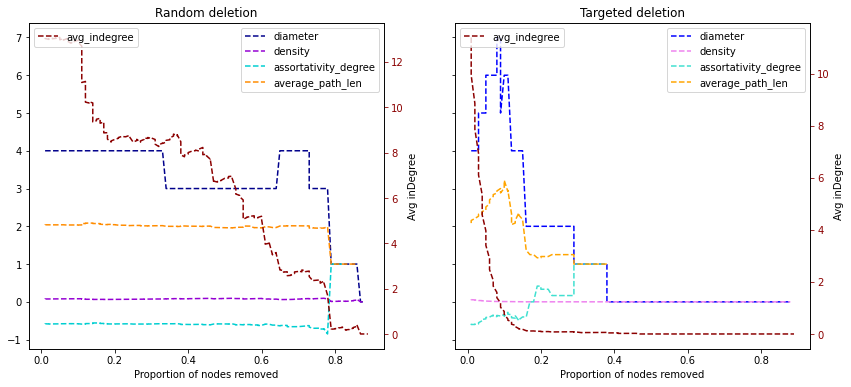

In [37]:
#Try plotting unweighted
fig, ax = plt.subplots(1,2,figsize=(14,6),sharey=True)
ax2_1 = ax[0].twinx()
ax[0].plot('prop_removed','diameter',data=df_type1_unweighted,ls='--',color='darkblue')
ax[0].plot('prop_removed','density',data=df_type1_unweighted,ls='--',color='darkviolet')
ax2_1.plot('prop_removed','avg_indegree',data=df_type1_unweighted,ls='--',color='darkred')
ax[0].plot('prop_removed','assortativity_degree',data=df_type1_unweighted,ls='--',color='darkturquoise')
ax[0].plot('prop_removed','average_path_len',data=df_type1_unweighted,ls='--',color='darkorange')
ax[0].legend(loc='upper right')
ax[0].set_xlabel('Proportion of nodes removed')
ax[0].set_title('Random deletion')
ax2_1.tick_params('y',colors='darkred')
ax2_1.set_ylabel('Avg inDegree')
ax2_1.legend(loc='upper left')

ax2_2 = ax[1].twinx()
ax[1].plot('prop_removed','diameter',data=df_type2_unweighted,ls='--',color='blue')
ax[1].plot('prop_removed','density',data=df_type2_unweighted,ls='--',color='violet')
ax2_2.plot('prop_removed','avg_indegree',data=df_type2_unweighted,ls='--',color='darkred')
ax[1].plot('prop_removed','assortativity_degree',data=df_type2_unweighted,ls='--',color='turquoise')
ax[1].plot('prop_removed','average_path_len',data=df_type2_unweighted,ls='--',color='orange')
ax[1].legend(loc='upper right')
ax[1].set_xlabel('Proportion of nodes removed')
ax[1].set_title('Targeted deletion')
ax2_2.tick_params('y',colors='darkred')
ax2_2.set_ylabel('Avg inDegree')
ax2_2.legend(loc='upper left')
plt.show()

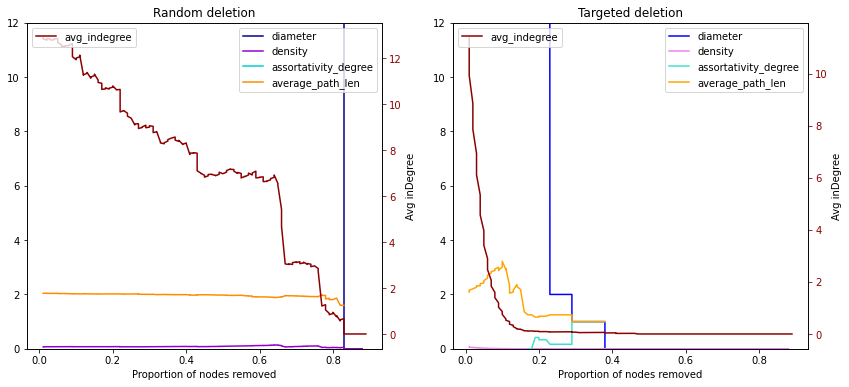

In [41]:
#Same but weighted
#Don't share y axis for type2
fig, ax = plt.subplots(1,2,figsize=(14,6),sharey=False)
ax2_1 = ax[0].twinx()
ax[0].plot('prop_removed','diameter',data=df_type1_weighted,ls='-',color='darkblue')
#set ylimit to 0 - 12 (to be same as type1; else there's a jump to 4000 for diameter)
ax[0].set_ylim([0,12])
ax[0].plot('prop_removed','density',data=df_type1_weighted,ls='-',color='darkviolet')
ax2_1.plot('prop_removed','avg_indegree',data=df_type1_weighted,ls='-',color='darkred')
ax[0].plot('prop_removed','assortativity_degree',data=df_type1_weighted,ls='-',color='darkturquoise')
ax[0].plot('prop_removed','average_path_len',data=df_type1_weighted,ls='-',color='darkorange')
ax[0].legend(loc='upper right')
ax[0].set_xlabel('Proportion of nodes removed')
ax[0].set_title('Random deletion')
ax2_1.tick_params('y',colors='darkred')
ax2_1.set_ylabel('Avg inDegree')
ax2_1.legend(loc='upper left')

ax2_2 = ax[1].twinx()
ax[1].plot('prop_removed','diameter',data=df_type2_weighted,ls='-',color='blue')
#set ylimit to 0 - 12 (to be same as type1; else there's a jump to 600 for diameter)
ax[1].set_ylim([0,12])
ax[1].plot('prop_removed','density',data=df_type2_weighted,ls='-',color='violet')
ax2_2.plot('prop_removed','avg_indegree',data=df_type2_weighted,ls='-',color='darkred')
ax[1].plot('prop_removed','assortativity_degree',data=df_type2_weighted,ls='-',color='turquoise')
ax[1].plot('prop_removed','average_path_len',data=df_type2_weighted,ls='-',color='orange')
ax[1].legend(loc='upper right')
ax[1].set_xlabel('Proportion of nodes removed')
ax[1].set_title('Targeted deletion')
ax2_2.tick_params('y',colors='darkred')
ax2_2.set_ylabel('Avg inDegree')
ax2_2.legend(loc='upper left')
plt.show()